In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]") \
        .appName("My_Introduction_to_PySpark")\
        .getOrCreate()

In [2]:
#For the documentation
#help(SparkSession)

The data that is used is the price of stock prices from Jan 2019 to Jul 2020.


  https://www.kaggle.com/dinnymathew/usstockprices

In [3]:
data = spark.read.csv("stocks_price_final.csv", sep = ',', header = True)
data.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: string (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- adjusted: string (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



It seems that all the data types are of the type 'string'. This is not useful for analysis especially when it comes to prices and volumes.

I guess the next thing to do is to set that straight

In [4]:
#Creating the schema
from pyspark.sql.types import *

data_schema = [
                StructField('_c0',IntegerType(),True),
                StructField('symbol',StringType(),True),
                StructField('data',DateType(),True),
                StructField('open',DoubleType(),True),
                StructField('high',DoubleType(),True),
                StructField('low',DoubleType(),True),
                StructField('close',DoubleType(),True),
                StructField('volume',IntegerType(),True),
                StructField('adjusted',DoubleType(),True),
                StructField('market_cap',StringType(),True),
                StructField('sector',StringType(),True),
                StructField('industry',StringType(),True),
                StructField('exchange',StringType(),True)
]

final_Struct = StructType(fields = data_schema)

In [5]:
#Re-reading the csv file, this time with the schema provided
data = spark.read.csv("stocks_price_final.csv", sep = ',', header = True, schema = final_Struct)



data.printSchema() # Gets the schema
data.dtypes #Prints the data types
data. head(10) #Prints the first 10 entries
data.show(5) #Shows the dataframe
data.first() #Shows the first row of the data
data.take(3) #Returns the first n rows of the data
data.describe() #Computes the summary statistics of numeric columns
data.columns#Returns the column names of the data
data.count()#Returns the number of rows in the data
data.printSchema() # Prints the schema of the data

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- data: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market_cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|

## Manipulating Columns


In [6]:
# Adding a column

data = data.withColumn('date', data.data)
data.show(3)

+---+------+----------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|_c0|symbol|      data|     open|  high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|      date|
+---+------+----------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|  1|   TXG|2019-09-12|     54.0|  58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-12|
|  2|   TXG|2019-09-13|    52.75|54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-13|
|  3|   TXG|2019-09-16|52.450001|  56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-16|
+---+------+----------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+------

In [7]:
#Updating a column

data= data.withColumnRenamed('date', 'date_changed')
data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+------------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|date_changed|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+------------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-12|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-13|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-16|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital 

In [8]:
#Deleting a column
data=data.drop('date_changed')
data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [9]:
data.na.drop()

DataFrame[_c0: int, symbol: string, data: date, open: double, high: double, low: double, close: double, volume: int, adjusted: double, market_cap: string, sector: string, industry: string, exchange: string]

### Querying Data

In [10]:
#Selecting a single column
data.select('sector').show(5)

+-------------+
|       sector|
+-------------+
|Capital Goods|
|Capital Goods|
|Capital Goods|
|Capital Goods|
|Capital Goods|
+-------------+
only showing top 5 rows



In [11]:
#Selecting Multiple Columns
data.select(['open','close','adjusted']).show(5)

+---------+---------+---------+
|     open|    close| adjusted|
+---------+---------+---------+
|     54.0|    52.75|    52.75|
|    52.75|    52.27|    52.27|
|52.450001|55.200001|55.200001|
|56.209999|56.779999|56.779999|
|56.849998|     62.0|     62.0|
+---------+---------+---------+
only showing top 5 rows



In [12]:
#Filtering data based on conditions

from pyspark.sql.functions import col, lit


#Filtering data in the month of Jan 2020
data.filter((col('data') >= lit('2020-01-01')) & (col('data') <= lit('2020-01-31')) ).show(5)

+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close|volume| adjusted|market_cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+
| 78|   TXG|2020-01-02|76.910004|77.989998|71.480003|72.830002|220200|72.830002|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 79|   TXG|2020-01-03|71.519997|76.188004|70.580002|75.559998|288300|75.559998|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 80|   TXG|2020-01-06|75.269997|77.349998|73.559998|75.550003|220600|75.550003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 81|   TXG|2020-01-07|     76.0|77.279999|    75.32|75.980003|182400|75.980003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 82|   TXG|2020-01-08|76.089996|76.949997|72.73

In [13]:
#Between
#This method returns either True or False if the passed values in the between method

data.filter(data.adjusted.between(100.0,500.0)).show()

+----+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
| _c0|symbol|      data|      open|      high|       low|     close|volume|  adjusted|market_cap|       sector|            industry|exchange|
+----+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
|  93|   TXG|2020-01-24| 95.459999|     101.0| 94.157997|100.790001|328100|100.790001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  94|   TXG|2020-01-27| 99.760002|104.892998| 97.019997|103.209999|334900|103.209999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  95|   TXG|2020-01-28|104.620003|108.269997|103.297997|106.620003|245400|106.620003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|6893|  ABMD|2019-01-02|315.940002|320.709991|307.029999|309.959991|590000|309.959991|   $13.39B|  Health Care|Medical/Dental In...|  NASDAQ|
|6894|

In [14]:
#Like
data.select('sector', 
            data.sector.rlike('^[B,C]').alias('Sector Starting with B or C')
            ).distinct().show()

+--------------------+---------------------------+
|              sector|Sector Starting with B or C|
+--------------------+---------------------------+
|         Health Care|                      false|
|       Capital Goods|                       true|
|Consumer Non-Dura...|                       true|
|    Public Utilities|                      false|
|   Consumer Durables|                       true|
|             Finance|                      false|
|      Transportation|                      false|
|       Miscellaneous|                      false|
|   Consumer Services|                       true|
|              Energy|                      false|
|    Basic Industries|                       true|
|          Technology|                      false|
+--------------------+---------------------------+



In [15]:
#GroupBy
data.select(['industry','open','close','adjusted']
           ).groupBy('industry')\
            .mean()\
            .show()

+--------------------+------------------+------------------+------------------+
|            industry|         avg(open)|        avg(close)|     avg(adjusted)|
+--------------------+------------------+------------------+------------------+
|Finance/Investors...| 5.134401785714288| 5.136630739795919| 4.991354066964286|
|       Miscellaneous| 16.38588266938775|16.359879090306126|16.148959322959186|
|Investment Banker...|58.950580945750225| 58.98308596082619| 58.15783725890314|
|   Food Distributors| 43.27450856935453| 43.27317810574849| 42.91047608357857|
|Miscellaneous man...|15.660586409948984|15.650934860969391|15.369818847193876|
|    Ophthalmic Goods|108.50137892138575| 108.5404598760826|108.52516121052633|
|        Broadcasting| 24.91678746482517| 24.91738845539515|24.699102029625312|
|Agricultural Chem...|22.046413928996596| 22.04205107631803|21.635093418154764|
|Biotechnology: Bi...|24.808083192324226| 24.80358714993552| 24.74507997827328|
|Other Specialty S...| 84.80718810562868

In [16]:
#Aggregation

data.filter( (col('data') >= lit('2019-01-02')) & (col('data') <= lit('2020-01-31')))\
    .groupBy("sector") \
    .agg(min("data").alias("From"),
        max("data").alias("To"), 
    
        min("open").alias("Minimum Opening"),
        max("open").alias("Maximum Opening"),
        avg("open").alias("Average Opening"),
    
    
        min("close").alias("Minimum Closing"),
        max("close").alias("Maximum Closing"),
        avg("close").alias("Average Closing"),
    
        min("adjusted").alias("Minimum Adjusted Closing"),
        max("adjusted").alias("Maximum Adjusted Closing"),
        avg("adjusted").alias("Average Adjusted Closing"),)


AttributeError: 'str' object has no attribute 'alias'

In [ ]:

data.filter( (col('data') >= lit('2019-01-02')) & (col('data') <= lit('2020-01-31')) )\
    .groupBy("sector") \
    .agg(min("data").alias("From"), 
         max("data").alias("To"), 
         
         min("open").alias("Minimum Opening"),
         max("open").alias("Maximum Opening"), 
         avg("open").alias("Average Opening"), 

         min("close").alias("Minimum Closing"), 
         max("close").alias("Maximum Closing"), 
         avg("close").alias("Average Closing"), 

         min("adjusted").alias("Minimum Adjusted Closing"), 
         max("adjusted").alias("Maximum Adjusted Closing"), 
         avg("adjusted").alias("Average Adjusted Closing"), 

      ).show(truncate=False)

## Data Visualization

In [ ]:
#!pip install matplotlib

In [24]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Sector', ylabel='Stock Price'>

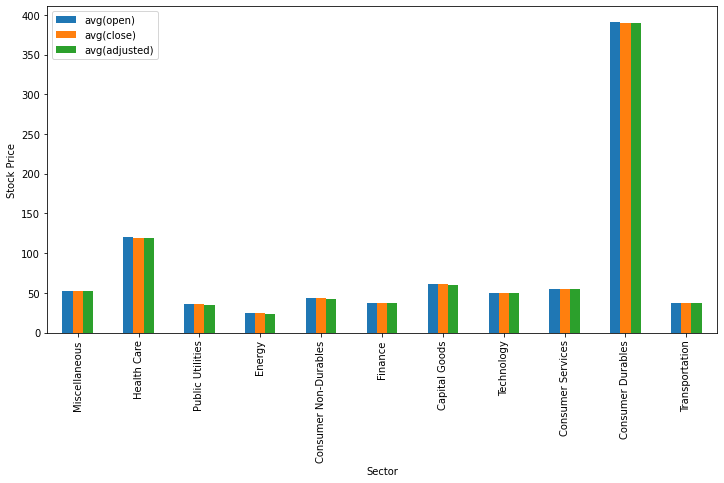

In [25]:
sec_df = data.select(['sector',
                     'open',
                     'close',
                     'adjusted'])\
                     .groupBy('sector')\
                     .mean()\
                     .toPandas()
ind = list(range(12))

ind.pop(6)

sec_df.iloc[ind,:].plot(kind = 'bar', x = 'sector',y = sec_df.columns.tolist()[1:],
                        figsize = (12,6),
                        ylabel = "Stock Price",
                        xlabel = "Sector")

In [30]:
sec_df.columns.tolist()

['sector', 'avg(open)', 'avg(close)', 'avg(adjusted)']

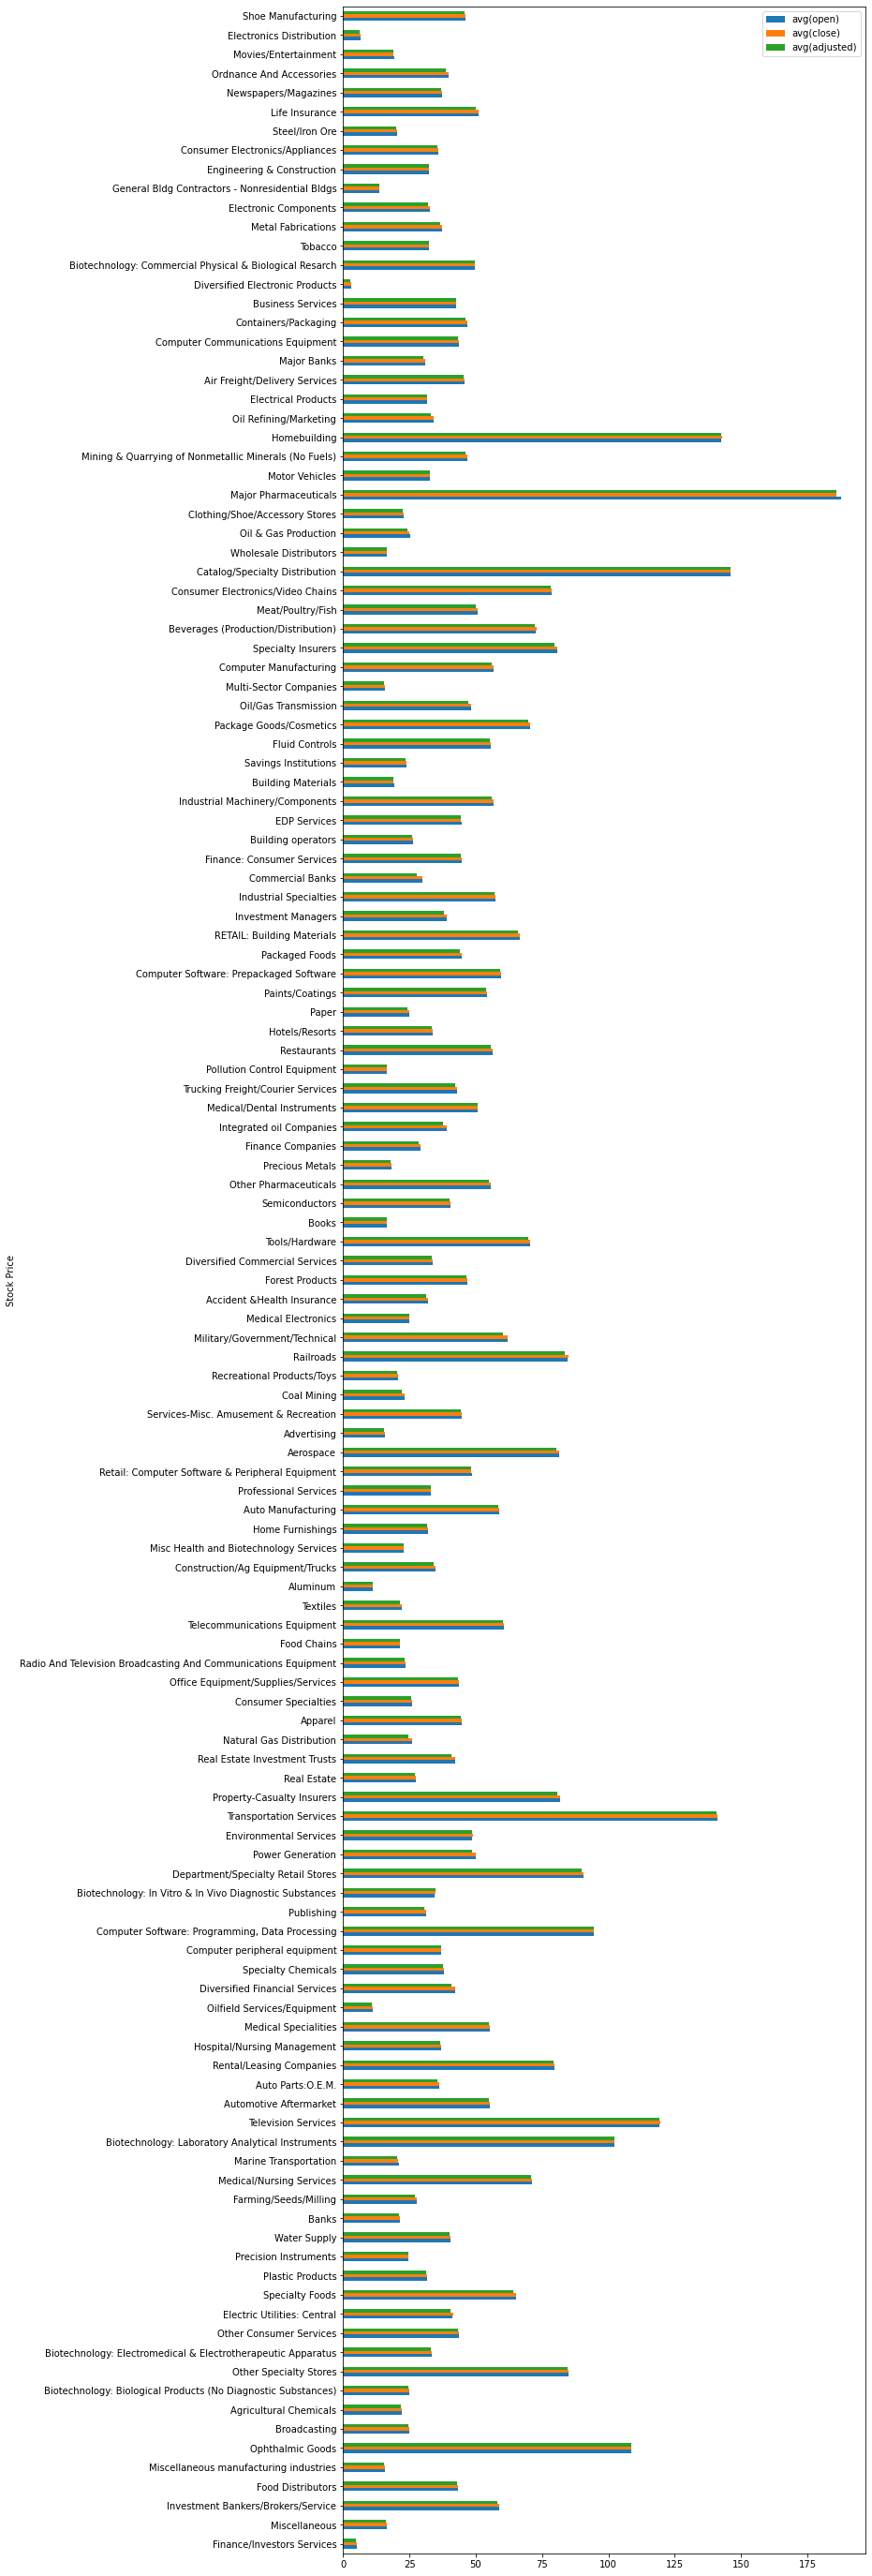

In [38]:
industries_x = data.select(['industry','open','close','adjusted']).groupBy('industry').mean().toPandas()
q = industries_x[(industries_x.industry != "Major Chemicals") & (industries_x.industry != "Building Products")]
q.plot(kind = 'barh', x = 'industry', y = q.columns.tolist()[1:], figsize = (10,50), xlabel = "Stock Price", ylabel = "Industry")

plt.show()

In [ ]:
from pyspark.sql.functions import col

tech = data.where(col('sector') == "Technology")\
        .select('data','open','close','adjusted')
fig,axes = plt.subplots(nrows = 3, ncols = 1, figsize = (60,30))

tech.toPandas().plot(kind = 'line',x = 'data', y = 'open',
                    xlabel = "Date Range", ylabel = "Stock Opening Price",
                    ax = axes[0], color = "mediumspringgreen")
tech.toPandas().plot(kind = 'line', x = "data", y = "close",
                    xlabel = "Date Range", ylabel = "Stock Closing Price",
                     ax = axes[1], color = "tomato")
tech.toPandas().plot(kind = 'line', x = 'data', y = 'adjusted',
                    xlabel = "Date Range", ylabel = "Stock Adjusted Price",
                    ax = axes[2], color = "orange")

# Saving the files

In [39]:
#Parquet
data.write.save('dataset.parquet', format = 'parquet')

In [ ]:
#csv
data.write.csv("dataset.csv")